# ASTR3110 Computer Laboratory 3: Classifying Images using Artificial and Convolutional Neural Networks.

In this Lab, you will be using imaging from the [CORNISH](https://cornish.leeds.ac.uk/public/index.php) survey to classify images using Neural Networks. The CORNISH survey aimed to understand massive star formation in our Galaxy by searching for ultra-compact HII regions (regions that have stars with mass > 8 times the mass of our Sun that are ionising the surrounding gas, which emit at radio wavelengths) in a portion of the plane of the disk of the Galaxy using the [Very Large Array Radio telescope](http://www.vla.nrao.edu).

While this survey successfully discovered many new HII regions, other sources such as planetary nebulae (PNE) and background galaxies (RGs) also emit at radio wavelengths, and so were also detected in the survey data. By design, the CORNISH survey targetted a region that also contained observations in the mid-infrared taken during another survey with the Spitzer Space telescope ([the GLIMPSE survey](https://irsa.ipac.caltech.edu/data/SPITZER/GLIMPSE/)). In particular, the 4.5, 5.8, and 8.0 $\mu$m Spitzer images allow us to distinguish HII regions, PNE, and RGs due to their differnt appearance (see top panel in the below image: leftmost is a PNE, middle a HII region, and right a RG).

![SegmentLocal](CORNISH_image.png)

In the first part of the lab, you will train and test an Artificial Neural Network classifier using 300 8.0 $\mu$m images (100 each for HII, PNE, and RG sources).

In the second part of the lab, you will train and test a Convolutional Neural Network classifier, using the same sample as in Part One, but adding the 4.5 and 5.8 $\mu$m images.

In both parts, you will need to run tests to determine the performance of your classifier, and tweak hyperparameters  in order to improve the performance. (N.B.: The term "hyperparameter" is reserved for those parameters that are set manually, e.g., the number of components in GMM, or the learning rate of your neural network. Normal parameters are determined from the data, e.g., the intercept and slope of a straight line fit)

## **If you are using google Colab, you may wish to switch to using a GPU hardware accelerator, as this can improve the speed of the Neural Networks. To do so, go to the "Edit" dropdown, click "Notebook Settings", and select "GPU" for the hardware accelerator. This needs to be done before you start coding!**

At the completion of this lab, you will have acquired (or improved) the following skills:
- Reading in fits images using astropy.
- Manipulating 2D image arrays to prepare them for input into the ANN and CNN architectures (using the ndimage and numpy packages).
- Using the keras packages for setting up and running ANN and CNN. classifiers.
- Using Scikit Learn and other packages to assess the performance of ANN and CNN classifiers.

You will be required to submit **two separate files** via iLearn (see the lab submission portal in the Assessments tab) by **11:55pm Friday 31st May 2024**. The files are:

1. **Your Colab notebook containing your code.** We will randomly select code cells to inspect and will mark them based on the following criteria, each worth **10 marks**:
    - **Comments: Your code must be commented and your comments should demonstrate that you understand what your code is doing, and why! You can insert comments by either adding explanation text placed in blocks just before code blocks OR as comments within the code blocks themselves. The marking rubric is as follows:**

            8.5-10: Thorough comments that clearly explain what and why, demonstrating excellent understanding of code.
            7.5-8.5: Comments that explain what and mostly why, demonstrate good understanding.
            6.5-7.5: Comments that mostly explain what, not why, mostly demonstrate understanding.
            5.0-6.5: Some comments explaining what or why, some demonstration of understanding.
            < 5.0: Minimal comments.

    - **Formatting of your code. Rubric:**

            8.5-10: Code is clear and easy to understand with sensible variable names.
            7.5-8.5: Mostly clear, understandable with semi-sensible variable names.
            6.5-7.5: Code is understandable OR good variable names.
            5-6.5: Some effort in formatting code OR using sensible variable names.
            < 5.: Spaghetti code, remnants of code bits that failed to run.

2. **A document (preferrably in pdf format) that contains the plots, explanation and justification  of experiments to design a better classifier, and comments on choice on a final best classifier and performance results <font color='blue'>highlighted in blue throughout the notebbook.</font>** We will mark those based on the following criteria, again worth **10 marks** each:
    - **Plots: Your plots should be well presented and explained. Rubric:**

            8.5-10: All requested plots are included and are accompanied by a caption that thoroughly explains them and details what they show and why plotted. Plots have clear symbols, clearly labeled axes, and axis ranges are set so that trends visible.
            7.5-8.5: All requested plots included and accompanied by captions that mostly explain what and why. Plots include good labels, ranges, and symbols.
            6.5-7.5: Most requested plots are included and captions mostly explain what. Good labels, ranges, and symbols.
            5-6.5: Most requested plots included, captions contain some explanation. Adequate labels, ranges, and symbols.
            < 5.0: Many missing plots, minimal effort in explaining or making sure plots/labels are clear.

    - **Explanations and justificatons of experiments to design a better classifier. Rubric:**
    
            8.5-10: Complete, thorough explanation and justification of how experiment helps with designing classifier.
            7.5-8.5: Complete explanation and justification that mostly explains and justifies experiments.
            6.5-7.5: Explained OR justified experiments.
            5-6.5: Some effort at one of explaining or jusitifying experiments.
            <5: No/minimal effort at explaining or justifying experiments.

    - **Comments on choice on a final best classifier and performance results. Rubric:**
    
            8.5-10: Excellent explanation of choice of classifier that is driven by the results of the experiments.
            7.5-8.5: Good explanation of choice, and of results.
            6.5-7.5: Adequate explanation of choice and results.
            5.-6.5: Some effort at explaining choice OR results.
            <5: No/minimal effort


# Part 1: Artificial Neural Networks
In this part, we will use the 8.0 $\mu$m images to design a classifier using the keras backend to build ANNs in a similar manner to that described in the [lectorial on ANNs](https://github.com/MQ-ASTR3110/ASTR3110_Tutorial_Notebooks_2024/blob/main/Solution_Notebooks/ASTR3110_Tutorial_9_ANNs.ipynb). First, the data must be read in and manipulated into a format that is accepted by the keras models.

## 1.1 Accessing the data.

You should clone the Github repository to your Google Drive as per the usual method [described here](https://github.com/MQ-ASTR3110/ASTR3110_Tutorial_Notebooks_2024/blob/main/SETUP_COLAB.md). **Please clone into a new directory so that you do not overwrite existing Labs!!**

As outlined above, the data that will be used in this lab consist of Spitzer imaging in the 4.5, 5.8, and 8.0 $\mu$m bands. The images have been uploaded to the [Github repository](https://github.com/MQ-ASTR3110/ASTR3110_Practical_Notebooks_2024/), and are stored the main ```Cornish_data``` directory, which contains three subdirectories: one each for ```HII```, ```PNE```, and ```RG``` sources. Within each of these subdirectories, there are 300 "fits" files: 3 files for each source, where the filename gives the Galactic coordinates, and the 3 files are for the different Spitzer bands (I2 = 4.5 $\mu$m, I3 = 5.8 $\mu$m, and I4 = 8.0 $\mu$m).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#This allows the notebook to access the files stored in my google drive

import os
os.chdir('/content/gdrive/MyDrive/ASTR3110_Labs/Prac03')
#This changes the current working directory to the specified path.

Mounted at /content/gdrive


In [ ]:
#Inputting the folders for the HII, PNE and RG folders containing the Fits files.
Cornish_data = "/content/gdrive/MyDrive/ASTR3110_Labs/Prac03/Cornish_data"
HII = Cornish_data + "/HII/"
PNE = Cornish_data + "/PNE/"
RG = Cornish_data + "/RG/"

##  1.2 Getting to know the data

The fits format is commonly used for storing astronomical data, and can store binary tables, images, cubes, and other formats (the format is also used by Garmin, Strava and other activity trackers), as well as coordinate and information for the image in a header. Fits files can be read into numpy arrays using the [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/#) package.

Using the [astropy.io.fits.getdata()](https://docs.astropy.org/en/stable/io/fits/api/files.html#astropy.io.fits.getdata) function, read the image data for one source from each of the HII, PNE, and RG folders. At this point, we only require access to the 8.0 $\mu$m band images (labelled \*_I4.fits). Using numpy functions, determine basic statistics for the images (min, max pixel values, and shape of the array).

<font color='blue'> **(1a)** Plot the images for the three sources to convince yourself that they appear to be different sources.</font>

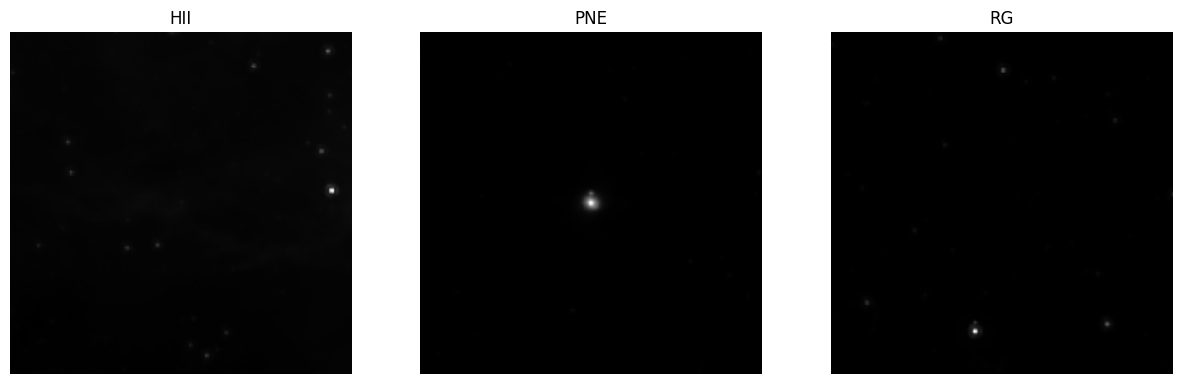

HII Image Statistics:
Min Pixel Value: 60.51827
Max Pixel Value: 1505.1821
Shape of Array: (302, 302)

PNE Image Statistics:
Min Pixel Value: 28.630396
Max Pixel Value: 5098.818
Shape of Array: (302, 302)

RG Image Statistics:
Min Pixel Value: 37.98436
Max Pixel Value: 3366.0293
Shape of Array: (302, 302)



In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# These lines define the paths to the specific FITS files for each source type.
Image_HII = HII + "G010.8519-00.4407_I4.fits"
Image_PNE = PNE + "G010.0989+00.7393_I4.fits"
Image_RG = RG + "G010.0500-00.6863_I4.fits"


# Function to read FITS file and return data
def read_fits(file_path):   # Defines a function named 'read_fits' that takes 'file_path' as an argument.
    data = fits.getdata(file_path)   # Uses the getdata() function from the fits module to read the data from the FITS file specified by 'file_path'
    min_val = np.min(data)   # Calculates the minimum value in the data array using numpy's min() function.
    max_val = np.max(data)   # Calculates the maximum value in the data array using numpy's max() function.
    shape = data.shape   # Retrieves the shape (dimensions) of the data array.
    return data, min_val, max_val, shape   # Returns the data array along with its minimum value, maximum value, and shape.

# Read data for one HII, PNE, and RG source
HII_data, HII_min_pix, HII_max_pix, HII_shape = read_fits(Image_HII)
PNE_data, PNE_min_pix, PNE_max_pix, PNE_shape = read_fits(Image_PNE)
RG_data, RG_min_pix, RG_max_pix, RG_shape = read_fits(Image_RG)

# These lines call the read_fits function for each type of source (HII, PNE, RG), passing the path to each image file.
# The function returns the image data and its statistics, which are stored in variables for later use.

# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(HII_data, cmap='gray', origin='lower')
ax[0].set_title("HII")
ax[1].imshow(PNE_data, cmap='gray', origin='lower')
ax[1].set_title("PNE")
ax[2].imshow(RG_data, cmap='gray', origin='lower')
ax[2].set_title("RG")

for a in ax:
    a.axis('off')  # Turns off the axis for each subplot to make the image cleaner.
plt.show()

print("HII Image Statistics:")
print("Min Pixel Value:", HII_min_pix)
print("Max Pixel Value:", HII_max_pix)
print("Shape of Array:", HII_shape)
print()

print("PNE Image Statistics:")
print("Min Pixel Value:", PNE_min_pix)
print("Max Pixel Value:", PNE_max_pix)
print("Shape of Array:", PNE_shape)
print()

print("RG Image Statistics:")
print("Min Pixel Value:", RG_min_pix)
print("Max Pixel Value:", RG_max_pix)
print("Shape of Array:", RG_shape)
print()

Because the images are relatively large, we want to resize them in order to decrease the runtime when we run our neural networks. Use the [scipy.ndimage.zoom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.zoom.html) function to bin the images to a coarser pixel scale. Plot the resulting coarsely binned image and compare with the original for each of the three sources. Try a few different 'zoom' factors and choose a suitable factor by which to reduce the size of your images. Note, you do not want to bin too much, otherwise you lose too much information.

<font color='blue'> **(1b)** Plot images for 2 zoom values (including your final chosen value) for the same three sources plotted in (1a) to convince yourself that they appear different.</font>


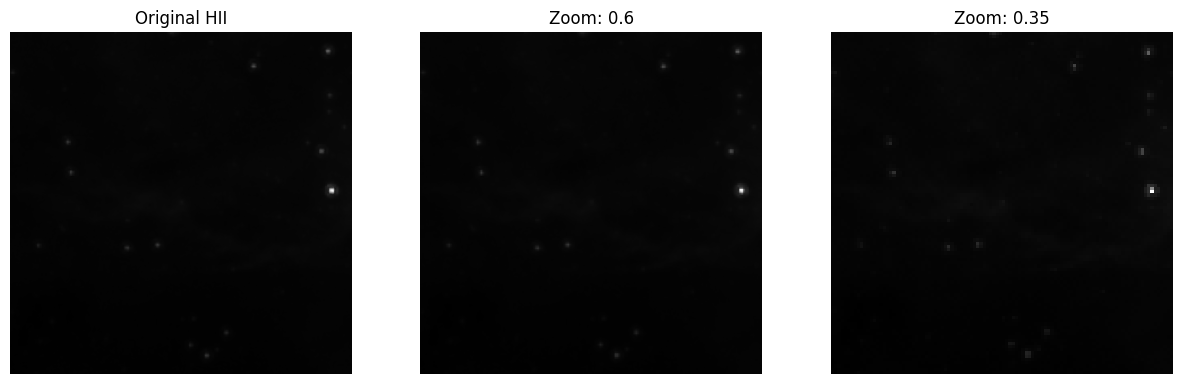

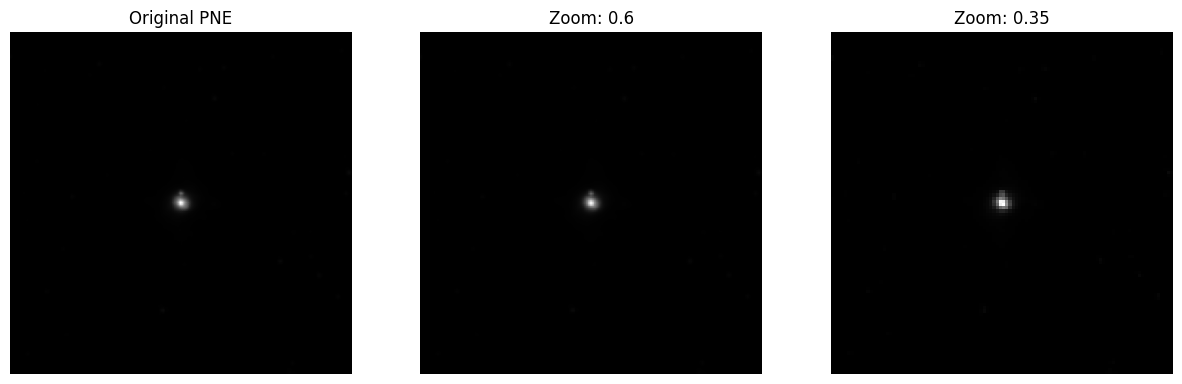

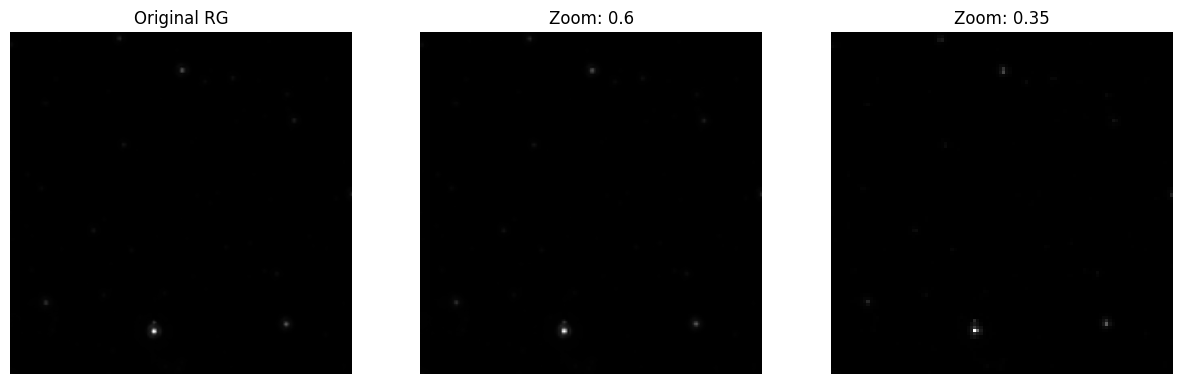

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from astropy.io import fits

# Paths to the FITS files
Image_HII = HII + "G010.8519-00.4407_I4.fits"
Image_PNE = PNE + "G010.0989+00.7393_I4.fits"
Image_RG = RG + "G010.0500-00.6863_I4.fits"

# Read the data from the FITS files
HII_data = fits.getdata(Image_HII)
PNE_data = fits.getdata(Image_PNE)
RG_data = fits.getdata(Image_RG)

# Define the zoom factors you want to test
zoom_factors = [0.6, 0.35]

# Function to plot original and zoomed images
def plot_images(data, title):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(zoom_factors) + 1, 1)
    plt.imshow(data, cmap='gray', origin='lower')
    plt.title(f'Original {title}')
    plt.axis('off')

    # Apply zoom and plot each zoom level
    for i, factor in enumerate(zoom_factors):
        zoomed_data = zoom(data, factor)
        plt.subplot(1, len(zoom_factors) + 1, i + 2)
        plt.imshow(zoomed_data, cmap='gray', origin='lower')
        plt.title(f'Zoom: {factor}')
        plt.axis('off')

    plt.show()

# Plot images for HII, PNE, and RG
plot_images(HII_data, "HII")
plot_images(PNE_data, "PNE")
plot_images(RG_data, "RG")

## 1.3 Preparing the data for the ANN

As you know from lectorial 9, as input to the ANN we require the images to be flattened to 1D arrays, and also normalised so that the pixel values are between 0 and 1. We also require labels for the sources (both single digit labels as well as the one-hot vectors of binarized labels), and a training and testing/validation sample.

To achieve some of the above, write a function that:
- accepts a directory path + fits filename (e.g., Cornish_data/HII/G010.8519-00.4407_I4.fits),
- reads the fits file using astropy.io.getdata,
- resizes the image,
- normalises the pixels values to be between 0 and 1,
- flattens the 2D images into 1D,
- returns the resized, normalised, flattened 1D array

You can use the [glob](https://docs.python.org/3/library/glob.html) function to return a list of filenames that can be looped over and read in by your function. You will need to stack each flattened image into a larger array that contains all 300 sources. In addition, you will need the corresponding 1D vector of labels, as well as the binarized version.

Finally, you will need to split your data into a training and testing/validation dataset (recall scikit learn's handy [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function).

In [ ]:
import numpy as np
from astropy.io import fits
from scipy.ndimage import zoom
from glob import glob
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def preprocess_fits(file_path, zoom_factor=0.6):
    # Read the FITS file
    data = fits.getdata(file_path)
    # Resize the image
    data_resized = zoom(data, zoom_factor)
    # Normalize the pixel values to be between 0 and 1
    data_normalized = data_resized / np.max(data_resized)
    # Flatten the 2D image to 1D array
    data_flattened = data_normalized.flatten()
    return data_flattened

    # Directories containing FITS files
HII_dir = os.path.join(Cornish_data, "HII")
PNE_dir = os.path.join(Cornish_data, "PNE")
RG_dir = os.path.join(Cornish_data, "RG")

# Get list of FITS files
HII_files = glob(os.path.join(HII_dir, "*I4.fits")) # Finds all files ending with I4.fits in the HII directory.
PNE_files = glob(os.path.join(PNE_dir, "*I4.fits")) # Finds all files ending with I4.fits in the PNE directory.
RG_files = glob(os.path.join(RG_dir, "*I4.fits")) # Finds all files ending with I4.fits in the RG directory.

# Combine all file paths
all_files = HII_files + PNE_files + RG_files

# Labels for the sources
labels = [0] * len(HII_files) + [1] * len(PNE_files) + [2] * len(RG_files) # A list of labels corresponding to each file (0 for HII, 1 for PNE, 2 for RG)

# Preprocess all images
processed_images = [preprocess_fits(file) for file in all_files]
processed_images = np.array(processed_images) # Convert the list of images to a numpy array.
labels = np.array(labels) # Convert the list of labels to a numpy array.

X_train, X_test, y_train, y_test = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Splits the data into training and testing sets.

y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Converts labels to one-hot encoded vectors.

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_cat.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test_cat.shape)

# This code reads FITS files, preprocesses the images (resizes, normalizes, and flattens them), splits the data into training and testing sets, and
# converts the labels to one-hot encoded vectors, preparing the data for training an artificial neural network.

X_train shape: (240, 32761)
y_train shape: (240, 3)
X_test shape: (60, 32761)
y_test shape: (60, 3)


## 1.4 Running the ANN

With your data prepared, you can now start building your ANN. Start off by building a Sequential ANN with the same architecture, optimizer, and hyperparameters as that used in [the ANN lectorial](https://github.com/MQ-ASTR3110/ASTR3110_Tutorial_Notebooks_2024/blob/main/Solution_Notebooks/ASTR3110_Tutorial_9_ANNs.ipynb), but modify the inputs so that they suit the data used here.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

# Define the ANN architecture
input_shape = processed_images[0].shape[0] # sets the input shape based on the actual shape of the preprocessed images.
model = Sequential()
model.add(Dense(256, input_shape=(input_shape,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))  # 3 classes: HII, PNE, RG

# A sequential model is created with three layers: The first Dense layer has 256 neurons, accepts input based on the actual shape of the preprocessed image, and uses
# the sigmoid activation function. The second Dense layer has 128 neurons and also uses the sigmoid activation function.
# The output layer has 3 neurons (for the 3 classes: HII, PNE, RG) and uses the softmax activation function.

# Compile the model
learnRate = 0.01
opt = SGD(learnRate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# The model is compiled with the following parameters: Loss function: categorical cross-entropy, Optimizer: Stochastic Gradient Descent (SGD) with a learning rate of 0.01, and
# Metrics: accuracy.

# Train the model
H = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=100, batch_size=64)

# The model is trained with the following parameters: Training data - X_train and y_train_cat, Validation data: X_test and y_test_cat, Epochs - 100, Batch size - 64.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat) # The model is evaluated on the test data to determine its accuracy.
print('Test accuracy:', test_acc)

# This code sets up our ANN using the architecture, optimizer, and hyperparameters specified, and trains it with our preprocessed data.

Epoch 1/100
4/4 [==============================] - 1s 158ms/step - loss: 1.2428 - accuracy: 0.3250 - val_loss: 1.1081 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 78ms/step - loss: 1.1455 - accuracy: 0.3250 - val_loss: 1.0900 - val_accuracy: 0.3500
Epoch 3/100
4/4 [==============================] - 0s 91ms/step - loss: 1.1136 - accuracy: 0.3250 - val_loss: 1.0911 - val_accuracy: 0.3833
Epoch 4/100
4/4 [==============================] - 0s 87ms/step - loss: 1.1034 - accuracy: 0.3125 - val_loss: 1.0975 - val_accuracy: 0.3167
Epoch 5/100
4/4 [==============================] - 0s 78ms/step - loss: 1.0992 - accuracy: 0.3458 - val_loss: 1.1013 - val_accuracy: 0.2833
Epoch 6/100
4/4 [==============================] - 0s 90ms/step - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.1014 - val_accuracy: 0.2667
Epoch 7/100
4/4 [==============================] - 0s 80ms/step - loss: 1.0979 - accuracy: 0.3500 - val_loss: 1.1018 - val_accuracy: 0.2667
Epoch 8/100
4/4 [==

## 1.5 Quantifying the performance

Once your model is trained, run a few predictions using the test data and compare with the known label. Produce a classification report using the test data.

<font color='blue'> **(1c)** Using the saved history from your model fit, plot on separate graphs the evolution of the Training and Testing/Validation loss and the evolution of the Training and Testing/Validation accuracy.</font> You can also use the plotting code from [Random Forest lectorial](https://github.com/MQ-ASTR3110/ASTR3110_Tutorial_Notebooks_2024/blob/main/Solution_Notebooks/ASTR3110_Tutorial_8_Random_Forest.ipynb) to produce a confusion matrix to help assess the classifier.

<font color='blue'> **(1d)** Based on the outputs of the classification report and the plots, assess the performance of the classifier. Please include the classification report in your document.</font>

2/2 [==============================] - 0s 18ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       1.00      0.32      0.48        22
         PNE       0.32      1.00      0.48        16
          RG       0.67      0.09      0.16        22

    accuracy                           0.42        60
   macro avg       0.66      0.47      0.38        60
weighted avg       0.70      0.42      0.36        60

Normalized confusion matrix
[[0.31818182 0.63636364 0.04545455]
 [0.         1.         0.        ]
 [0.         0.90909091 0.09090909]]


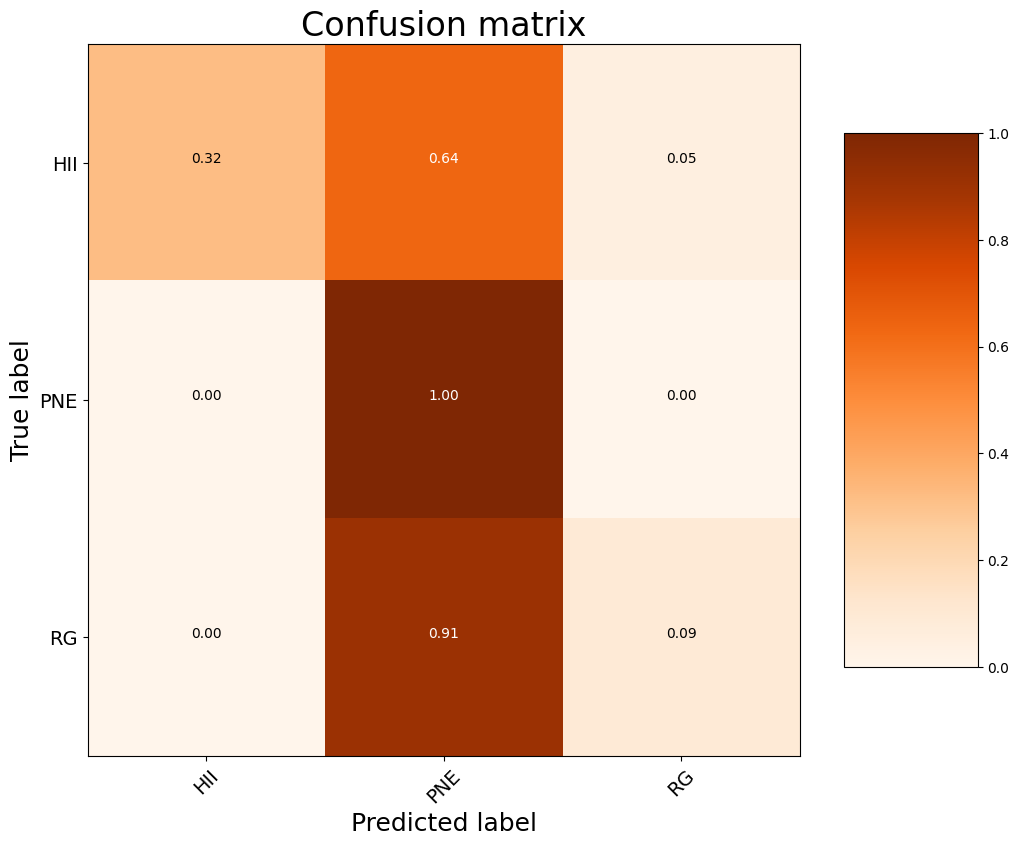

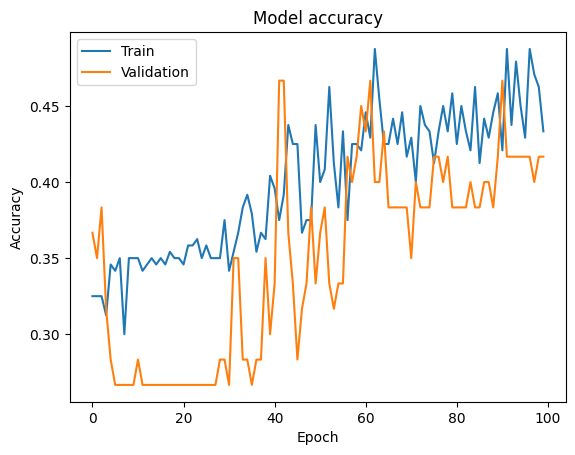

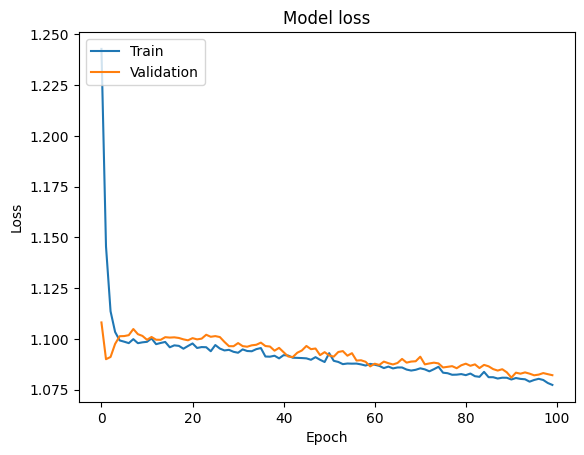

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Predict the labels for the test data
y_pred = model.predict(X_test) #  uses the trained model to predict the output probabilities for each class on the test data 'X_test'.
y_pred_classes = np.argmax(y_pred, axis=1) # This line converts the predicted probabilities into class labels by taking the index of the highest probability for each prediction.
# The np.argmax function returns the indices of the maximum values along an axis. Here, axis=1 means it operates along rows, i.e., for each sample.
y_true_classes = np.argmax(y_test_cat, axis=1) # This line converts the true labels from one-hot encoded format back to class labels using the same np.argmax function.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes) # This function computes the confusion matrix to evaluate the accuracy of the classification.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes)) # Generates an array of tick marks based on the number of classes.
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'  # Chooses the format for the matrix values: two decimal places if normalized, otherwise integers.
    thresh = cm.max() / 2.  # Sets a threshold for changing the text color based on the maximum value in the confusion matrix.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black") # Adds text annotations to the matrix cells, using white text on dark cells and black text on light cells.

    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['HII', 'PNE', 'RG'], normalize=True)

plt.show()

# Plot the training and validation accuracy and loss
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 1.6 Tweak the hyperparameters to improve performance

Try to improve your classifier by changing the following:

- The learning rate and number of epochs (smaller learning rate generally requires more training epochs and vice versa).
- The number of hidden layers (only try 1-2 fewer/more).
- The number of neurons in the layers (again, only try 1-2 different values).

<font color='blue'> **(1e)** For each tweak, explain and justify what was changed, run the classification reports, generate a confusion matrix, produce plots of the history of the Loss and Accuracy, and give a brief assessment of the performance.</font>

<font color='blue'> **(1f)** Finally, give a summary report for the best classifier achieved, and outline which of the changes was the most effective.</font>

In [ ]:
# For part 1.6, before running each ANN, I have mentioned what tweaks were made for the following ANN run.

In [ ]:
# First, we add more neurons in each layer.

Epoch 1/100
4/4 [==============================] - 2s 406ms/step - loss: 1.2548 - accuracy: 0.3500 - val_loss: 1.1552 - val_accuracy: 0.2667
Epoch 2/100
4/4 [==============================] - 1s 301ms/step - loss: 1.1129 - accuracy: 0.3500 - val_loss: 1.1112 - val_accuracy: 0.2667
Epoch 3/100
4/4 [==============================] - 1s 285ms/step - loss: 1.1004 - accuracy: 0.3500 - val_loss: 1.1065 - val_accuracy: 0.2667
Epoch 4/100
4/4 [==============================] - 1s 183ms/step - loss: 1.0993 - accuracy: 0.3500 - val_loss: 1.1020 - val_accuracy: 0.3500
Epoch 5/100
4/4 [==============================] - 1s 179ms/step - loss: 1.0993 - accuracy: 0.3458 - val_loss: 1.1099 - val_accuracy: 0.2667
Epoch 6/100
4/4 [==============================] - 1s 176ms/step - loss: 1.1007 - accuracy: 0.3375 - val_loss: 1.1163 - val_accuracy: 0.2667
Epoch 7/100
4/4 [==============================] - 1s 177ms/step - loss: 1.1017 - accuracy: 0.3417 - val_loss: 1.1105 - val_accuracy: 0.2667
Epoch 8/100
4

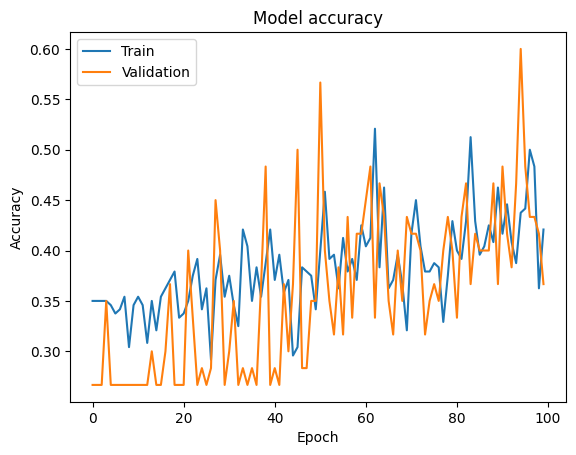

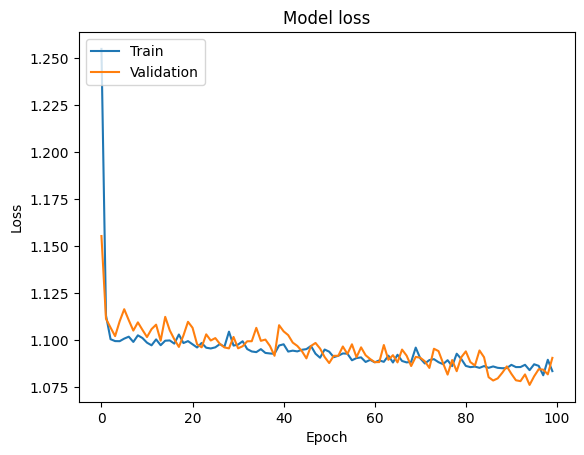

2/2 [==============================] - 0s 32ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       1.00      0.27      0.43        22
         PNE       0.30      1.00      0.46        16
          RG       0.00      0.00      0.00        22

    accuracy                           0.37        60
   macro avg       0.43      0.42      0.30        60
weighted avg       0.45      0.37      0.28        60

Normalized confusion matrix
[[0.27272727 0.68181818 0.04545455]
 [0.         1.         0.        ]
 [0.         1.         0.        ]]


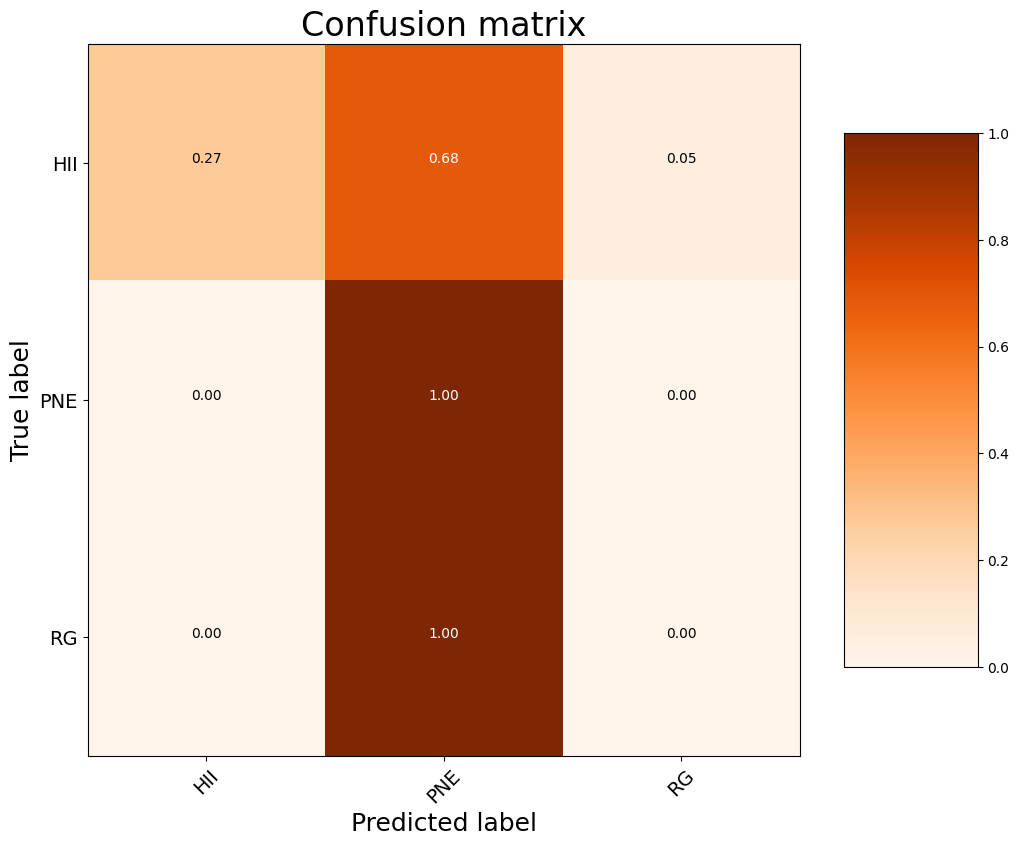

In [ ]:
# Define the ANN architecture with more neurons in each layer
model = Sequential()
model.add(Dense(512, input_shape=(input_shape,), activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))  # 3 classes: HII, PNE, RG

# A sequential model is created with three layers: The first Dense layer has 512 neurons, accepts input based on the actual shape of the preprocessed image, and uses
# the sigmoid activation function. The second Dense layer has 256 neurons and also uses the sigmoid activation function.
# The output layer has 3 neurons (for the 3 classes: HII, PNE, RG) and uses the softmax activation function.

# Compile the model with the same learning rate
learnRate = 0.01
opt = SGD(learning_rate=learnRate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# The model is compiled with the following parameters: Loss function: categorical cross-entropy, Optimizer: Stochastic Gradient Descent (SGD) with a learning rate of 0.01, and
# Metrics: accuracy.

# Train the model
H = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=100, batch_size=64)

# # The model is trained with the following parameters: Training data - X_train and y_train_cat, Validation data: X_test and y_test_cat, Epochs - 100, Batch size - 64.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat) # The model is evaluated on the test data to determine its accuracy.
print('Test accuracy:', test_acc)

# Plot training & validation accuracy and loss values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict the labels for the test data
y_pred = model.predict(X_test) #  uses the trained model to predict the output probabilities for each class on the test data 'X_test'.
y_pred_classes = np.argmax(y_pred, axis=1) # This line converts the predicted probabilities into class labels by taking the index of the highest probability for each prediction.
# The np.argmax function returns the indices of the maximum values along an axis. Here, axis=1 means it operates along rows, i.e., for each sample.
y_true_classes = np.argmax(y_test_cat, axis=1) # This line converts the true labels from one-hot encoded format back to class labels using the same np.argmax function.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['HII', 'PNE', 'RG'], normalize=True)
plt.show()

In [ ]:
# This time, we add an additional hidden layer.

Epoch 1/100
4/4 [==============================] - 1s 153ms/step - loss: 1.3147 - accuracy: 0.3500 - val_loss: 1.3435 - val_accuracy: 0.2667
Epoch 2/100
4/4 [==============================] - 0s 89ms/step - loss: 1.2391 - accuracy: 0.3500 - val_loss: 1.2662 - val_accuracy: 0.2667
Epoch 3/100
4/4 [==============================] - 0s 96ms/step - loss: 1.1887 - accuracy: 0.3500 - val_loss: 1.2082 - val_accuracy: 0.2667
Epoch 4/100
4/4 [==============================] - 0s 87ms/step - loss: 1.1511 - accuracy: 0.3500 - val_loss: 1.1730 - val_accuracy: 0.2667
Epoch 5/100
4/4 [==============================] - 0s 93ms/step - loss: 1.1312 - accuracy: 0.3500 - val_loss: 1.1499 - val_accuracy: 0.2667
Epoch 6/100
4/4 [==============================] - 0s 119ms/step - loss: 1.1175 - accuracy: 0.3500 - val_loss: 1.1335 - val_accuracy: 0.2667
Epoch 7/100
4/4 [==============================] - 0s 79ms/step - loss: 1.1098 - accuracy: 0.3500 - val_loss: 1.1232 - val_accuracy: 0.2667
Epoch 8/100
4/4 [=

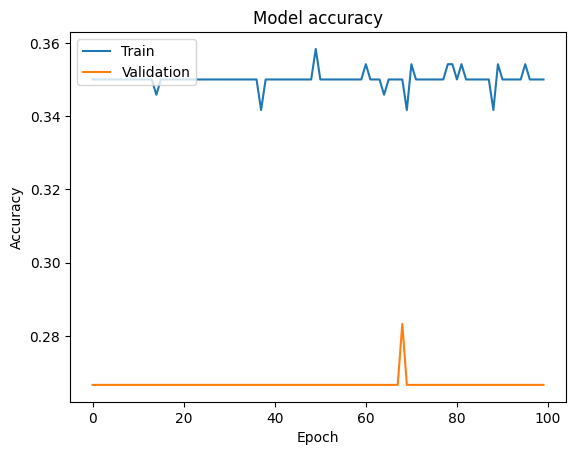

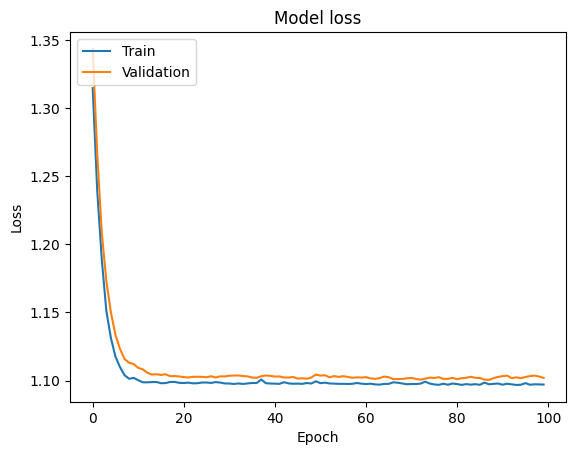

2/2 [==============================] - 0s 20ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       0.00      0.00      0.00        22
         PNE       0.27      1.00      0.42        16
          RG       0.00      0.00      0.00        22

    accuracy                           0.27        60
   macro avg       0.09      0.33      0.14        60
weighted avg       0.07      0.27      0.11        60

Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


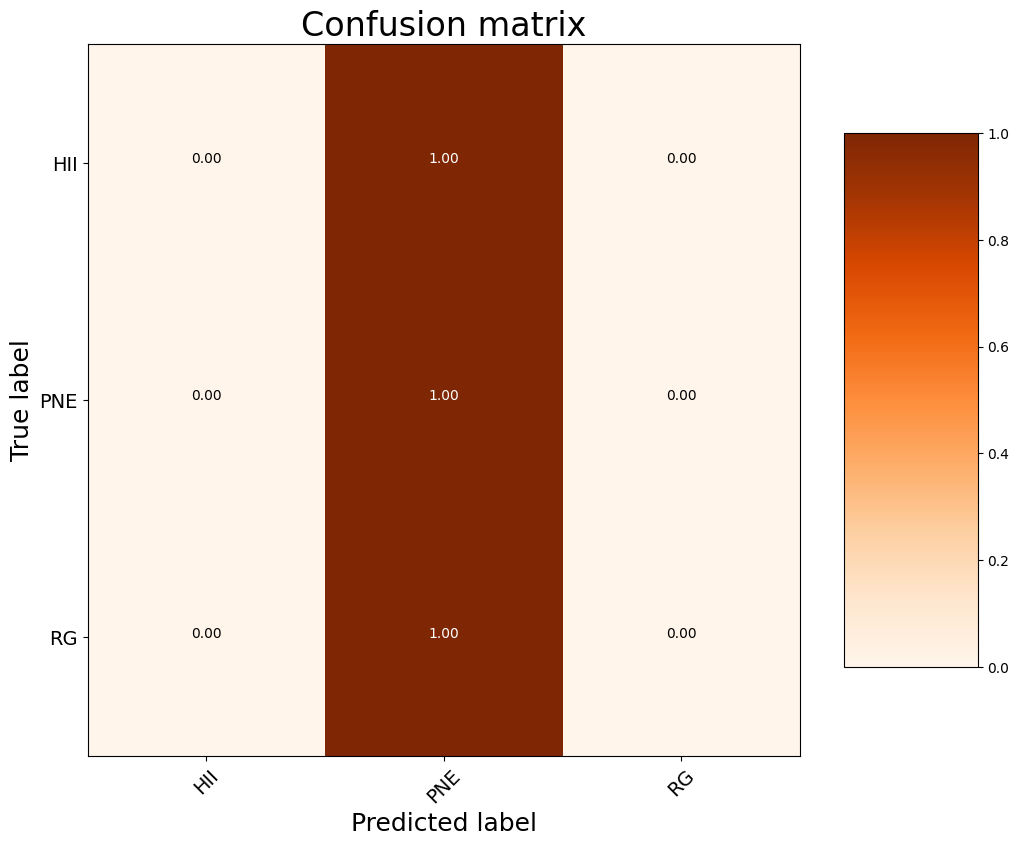

In [ ]:
# Define the ANN architecture with an additional hidden layer
model = Sequential()
model.add(Dense(256, input_shape=(input_shape,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))  # Additional hidden layer
model.add(Dense(3, activation='softmax'))  # 3 classes: HII, PNE, RG

# A sequential model is created with four layers: The first Dense layer has 256 neurons, accepts input based on the actual shape of the preprocessed image, and uses
# the sigmoid activation function. The second Dense layer has 128 neurons and also uses the sigmoid activation function. The third Dense layer has 64 neurons and uses sigmoid activation function.
# The output layer has 3 neurons (for the 3 classes: HII, PNE, RG) and uses the softmax activation function.

# Compile the model with the same learning rate
learnRate = 0.01
opt = SGD(learning_rate=learnRate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# The model is compiled with the following parameters: Loss function: categorical cross-entropy, Optimizer: Stochastic Gradient Descent (SGD) with a learning rate of 0.01, and
# Metrics: accuracy.

# Train the model
H = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=100, batch_size=64)

# The model is trained with the following parameters: Training data - X_train and y_train_cat, Validation data: X_test and y_test_cat, Epochs - 100, Batch size - 64.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat) # The model is evaluated on the test data to determine its accuracy.
print('Test accuracy:', test_acc)

# Plot training & validation accuracy and loss values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict the labels for the test data
y_pred = model.predict(X_test) #  uses the trained model to predict the output probabilities for each class on the test data 'X_test'.
y_pred_classes = np.argmax(y_pred, axis=1) # This line converts the predicted probabilities into class labels by taking the index of the highest probability for each prediction.
# The np.argmax function returns the indices of the maximum values along an axis. Here, axis=1 means it operates along rows, i.e., for each sample.
y_true_classes = np.argmax(y_test_cat, axis=1) # This line converts the true labels from one-hot encoded format back to class labels using the same np.argmax function.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['HII', 'PNE', 'RG'], normalize=True)
plt.show()

In [ ]:
# This time, we tweak the learning rate (Decrease it) and the epochs (Increase the number of Epochs)

Epoch 1/200
4/4 [==============================] - 3s 447ms/step - loss: 1.1329 - accuracy: 0.3500 - val_loss: 1.1558 - val_accuracy: 0.2667
Epoch 2/200
4/4 [==============================] - 1s 287ms/step - loss: 1.1192 - accuracy: 0.3500 - val_loss: 1.1390 - val_accuracy: 0.2667
Epoch 3/200
4/4 [==============================] - 1s 160ms/step - loss: 1.1099 - accuracy: 0.3500 - val_loss: 1.1265 - val_accuracy: 0.2667
Epoch 4/200
4/4 [==============================] - 1s 142ms/step - loss: 1.1051 - accuracy: 0.3500 - val_loss: 1.1192 - val_accuracy: 0.2667
Epoch 5/200
4/4 [==============================] - 1s 177ms/step - loss: 1.1016 - accuracy: 0.3500 - val_loss: 1.1139 - val_accuracy: 0.2667
Epoch 6/200
4/4 [==============================] - 1s 242ms/step - loss: 1.1007 - accuracy: 0.3500 - val_loss: 1.1103 - val_accuracy: 0.2667
Epoch 7/200
4/4 [==============================] - 0s 93ms/step - loss: 1.1001 - accuracy: 0.3500 - val_loss: 1.1098 - val_accuracy: 0.2667
Epoch 8/200
4/

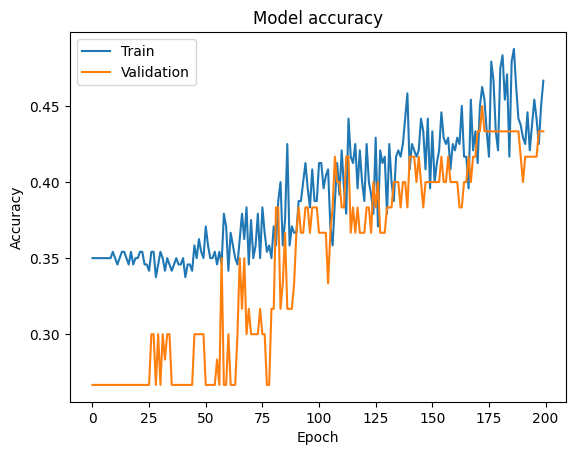

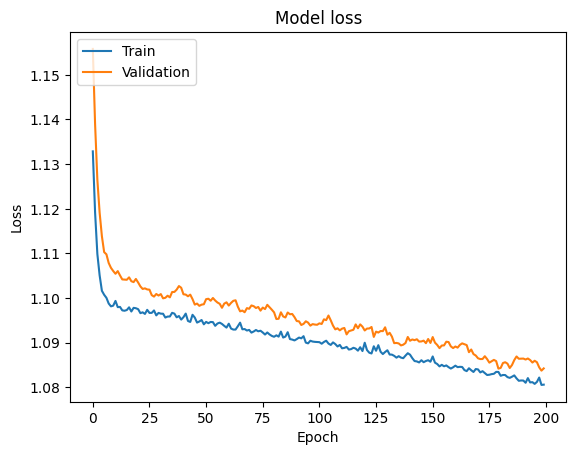

2/2 [==============================] - 0s 20ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       1.00      0.36      0.53        22
         PNE       0.33      0.94      0.48        16
          RG       0.50      0.14      0.21        22

    accuracy                           0.43        60
   macro avg       0.61      0.48      0.41        60
weighted avg       0.64      0.43      0.40        60

Normalized confusion matrix
[[0.36363636 0.54545455 0.09090909]
 [0.         0.9375     0.0625    ]
 [0.         0.86363636 0.13636364]]


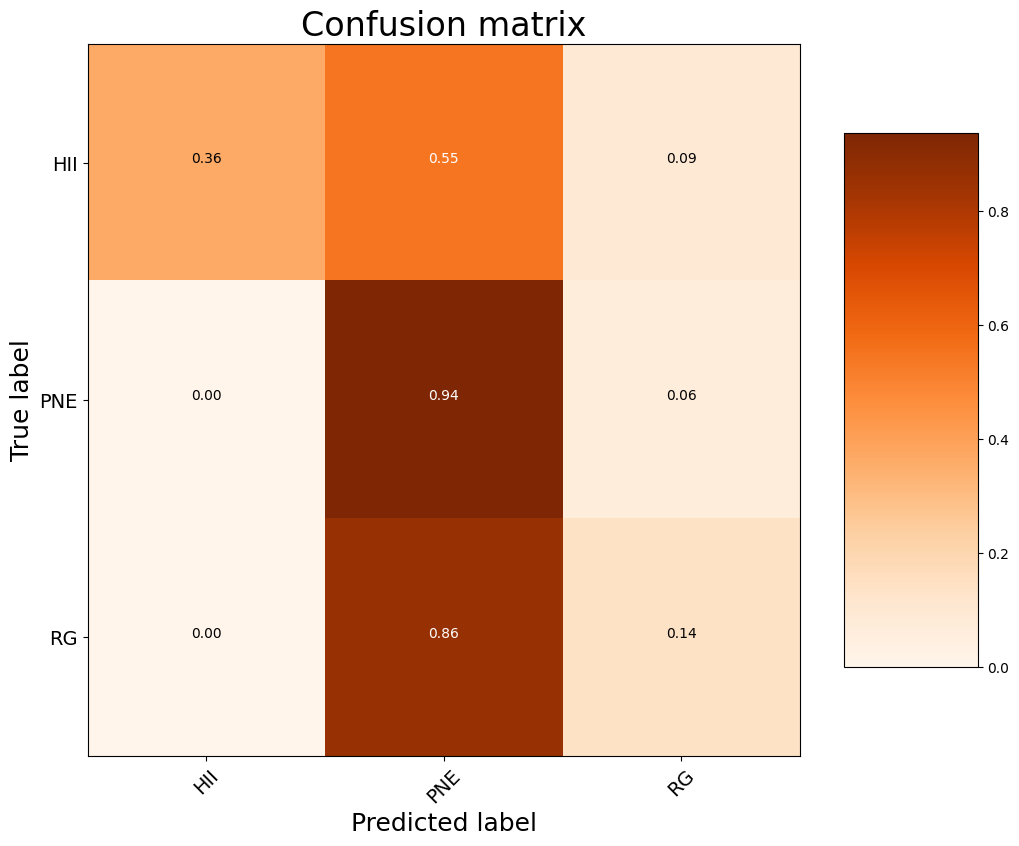

In [ ]:
# Define the ANN architecture with new learning rate and epochs
input_shape = processed_images[0].shape[0]
model = Sequential()
model.add(Dense(256, input_shape=(input_shape,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))  # 3 classes: HII, PNE, RG

# A sequential model is created with three layers: The first Dense layer has 256 neurons, accepts input based on the actual shape of the preprocessed image, and uses
# the sigmoid activation function. The second Dense layer has 128 neurons and also uses the sigmoid activation function.
# The output layer has 3 neurons (for the 3 classes: HII, PNE, RG) and uses the softmax activation function.

# Compile the model with a smaller learning rate
learnRate = 0.005
opt = SGD(learning_rate=learnRate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# The model is compiled with the following parameters: Loss function: categorical cross-entropy, Optimizer: Stochastic Gradient Descent (SGD) with a changed learning rate of 0.005, and
# Metrics: accuracy.

# Train the model with more epochs
epochs = 200
batch_size = 64

H = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=epochs, batch_size=batch_size)

# The model is trained with the following parameters: Training data - X_train and y_train_cat, Validation data: X_test and y_test_cat, Epochs - 200, Batch size - 64.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat) # The model is evaluated on the test data to determine its accuracy.
print('Test accuracy:', test_acc)

# Plot training & validation accuracy and loss values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict the labels for the test data
y_pred = model.predict(X_test) #  uses the trained model to predict the output probabilities for each class on the test data 'X_test'.
y_pred_classes = np.argmax(y_pred, axis=1) # This line converts the predicted probabilities into class labels by taking the index of the highest probability for each prediction.
# The np.argmax function returns the indices of the maximum values along an axis. Here, axis=1 means it operates along rows, i.e., for each sample.
y_true_classes = np.argmax(y_test_cat, axis=1) # This line converts the true labels from one-hot encoded format back to class labels using the same np.argmax function.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['HII', 'PNE', 'RG'], normalize=True)
plt.show()

In [ ]:
# Finally, we change the activation type.

Epoch 1/100
4/4 [==============================] - 1s 154ms/step - loss: 1.1031 - accuracy: 0.3542 - val_loss: 1.0971 - val_accuracy: 0.4333
Epoch 2/100
4/4 [==============================] - 0s 92ms/step - loss: 1.0852 - accuracy: 0.4667 - val_loss: 1.0703 - val_accuracy: 0.6500
Epoch 3/100
4/4 [==============================] - 0s 81ms/step - loss: 1.0707 - accuracy: 0.5375 - val_loss: 1.0583 - val_accuracy: 0.6333
Epoch 4/100
4/4 [==============================] - 0s 85ms/step - loss: 1.0576 - accuracy: 0.5375 - val_loss: 1.0452 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 94ms/step - loss: 1.0464 - accuracy: 0.6000 - val_loss: 1.0384 - val_accuracy: 0.5333
Epoch 6/100
4/4 [==============================] - 0s 91ms/step - loss: 1.0353 - accuracy: 0.6208 - val_loss: 1.0335 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 95ms/step - loss: 1.0253 - accuracy: 0.6083 - val_loss: 1.0145 - val_accuracy: 0.6333
Epoch 8/100
4/4 [==

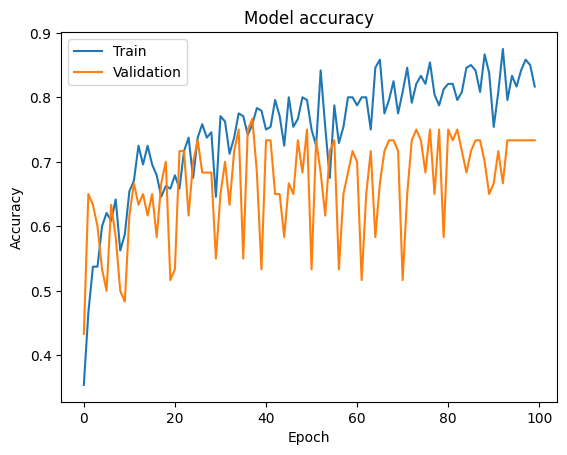

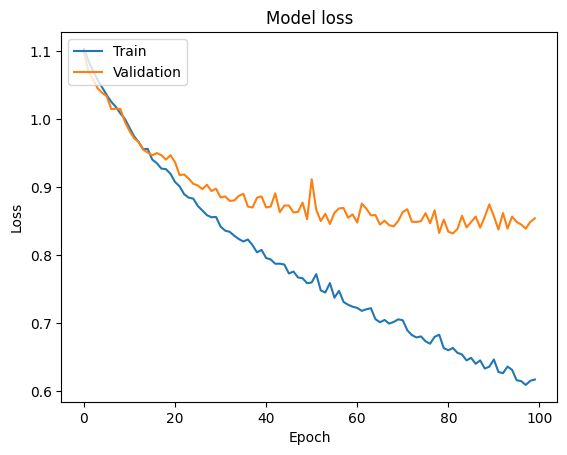

2/2 [==============================] - 0s 22ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       0.88      0.68      0.77        22
         PNE       0.57      0.75      0.65        16
          RG       0.77      0.77      0.77        22

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.76      0.73      0.74        60

Normalized confusion matrix
[[0.68181818 0.22727273 0.09090909]
 [0.0625     0.75       0.1875    ]
 [0.04545455 0.18181818 0.77272727]]


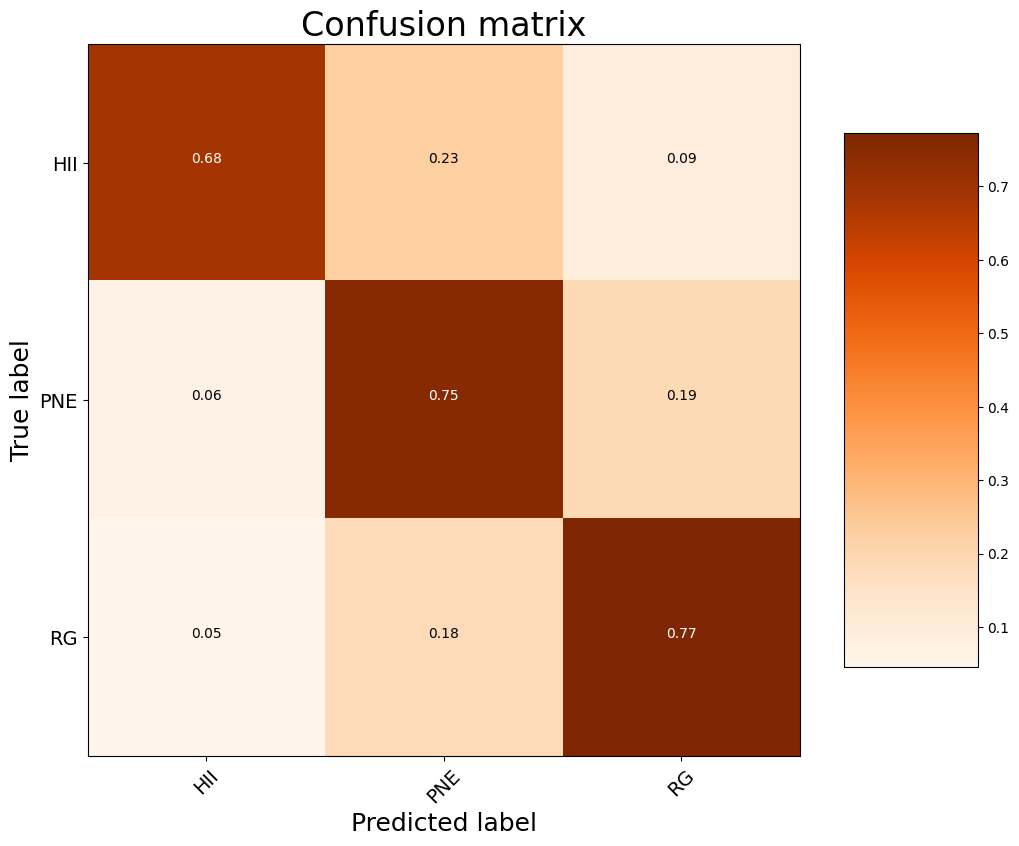

In [ ]:
# Define the ANN architecture with new activation type.
input_shape = processed_images[0].shape[0]
model = Sequential()
model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes: HII, PNE, RG

# A sequential model is created with three layers: The first Dense layer has 256 neurons, accepts input based on the actual shape of the preprocessed image, and uses
# the relu activation function. The second Dense layer has 128 neurons and also uses the relu activation function.
# The output layer has 3 neurons (for the 3 classes: HII, PNE, RG) and uses the softmax activation function.

# Compile the model with a smaller learning rate
learnRate = 0.01
opt = SGD(learning_rate=learnRate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# The model is compiled with the following parameters: Loss function: categorical cross-entropy, Optimizer: Stochastic Gradient Descent (SGD) with a learning rate of 0.01, and
# Metrics: accuracy.

# Train the model with the same epochs and batch size as the original ANN (Part 1.4)
epochs = 100
batch_size = 64

H = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=epochs, batch_size=batch_size)

# The model is trained with the following parameters: Training data - X_train and y_train_cat, Validation data: X_test and y_test_cat, Epochs - 100, Batch size - 64.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat) # The model is evaluated on the test data to determine its accuracy.
print('Test accuracy:', test_acc)

# Plot training & validation accuracy and loss values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict the labels for the test data
y_pred = model.predict(X_test) #  uses the trained model to predict the output probabilities for each class on the test data 'X_test'.
y_pred_classes = np.argmax(y_pred, axis=1) # This line converts the predicted probabilities into class labels by taking the index of the highest probability for each prediction.
# The np.argmax function returns the indices of the maximum values along an axis. Here, axis=1 means it operates along rows, i.e., for each sample.
y_true_classes = np.argmax(y_test_cat, axis=1) # This line converts the true labels from one-hot encoded format back to class labels using the same np.argmax function.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['HII', 'PNE', 'RG'], normalize=True)
plt.show()

# <font color='red'> Aim to get up to here by the end of Lab session 1 </font>

# Part 2: Convolutional Neural Networks

In this part, you will build a classifier for the same dataset, but now using all three Spitzer bands (I2 = 4.5 $\mu$m, I3 = 5.8 $\mu$m, I4 = 8 $\mu$m) as input to a CNN.


## Preparing the data

As input, CNNs take a 4D array of images with shape (N_source, N_pix, N_pix, N_channel), where  N_source is the number of sources in your batch of data, N_pix is the number of pixels (can be different for width/height), and N_channel is the number of different colour images available per source (this could be RGB channels for standard images, but here it is the 3 Spitzer bands). As for the ANNs, we also require labels that have been binarized. You need to write a function similar to the one used to manipulate the data for the ANN, but modified to produce the desired input for the CNN:
- For each source, read and then resize the I2, I3, and I4 images. Stack to form an array with shape (N_pix, N_pix, N_channel).
- Normalise each image in the stack, but here we'd like to maintain the colour differences. So, determine the maximum  across all 3 images and use that as your nomalisation factor for all three images.

In a similar fashion to Part 1, you will need to loop over each source, read in the images, and save to a 4D array with shape (N_source, N_pix, N_pix, N_Channel).  Again, you will require a vector containing the labels for each source, as well as the binarized version.

Once you have the array containing the images and the labels, split your data into a training and test/validation set.

In [ ]:
import numpy as np
import os
from glob import glob
from astropy.io import fits
from sklearn.model_selection import train_test_split
from scipy.ndimage import zoom

# Function to read and preprocess images
def preprocess_image(image_path, zoom_factor):
    # Read the fits file
    image_data = fits.getdata(image_path)
    # Resize the image using zoom factor
    resized_image = zoom(image_data, zoom_factor)
    return resized_image

def load_and_preprocess_data(HII_dir, PNE_dir, RG_dir, zoom_factor=0.6):
    # Get list of all FITS files
    HII_I2_files = glob(os.path.join(HII_dir, "*I2.fits"))
    HII_I3_files = glob(os.path.join(HII_dir, "*I3.fits"))
    HII_I4_files = glob(os.path.join(HII_dir, "*I4.fits"))

    PNE_I2_files = glob(os.path.join(PNE_dir, "*I2.fits"))
    PNE_I3_files = glob(os.path.join(PNE_dir, "*I3.fits"))
    PNE_I4_files = glob(os.path.join(PNE_dir, "*I4.fits"))

    RG_I2_files = glob(os.path.join(RG_dir, "*I2.fits"))
    RG_I3_files = glob(os.path.join(RG_dir, "*I3.fits"))
    RG_I4_files = glob(os.path.join(RG_dir, "*I4.fits"))

    # Make sure the files are sorted in the same order
    HII_I2_files.sort()
    HII_I3_files.sort()
    HII_I4_files.sort()

    PNE_I2_files.sort()
    PNE_I3_files.sort()
    PNE_I4_files.sort()

    RG_I2_files.sort()
    RG_I3_files.sort()
    RG_I4_files.sort()

    images = []
    labels = []

    # Function to process files for a given class
    def process_class(I2_files, I3_files, I4_files, class_label):
        for I2_file, I3_file, I4_file in zip(I2_files, I3_files, I4_files):
            # Preprocess each image
            I2_image = preprocess_image(I2_file, zoom_factor)
            I3_image = preprocess_image(I3_file, zoom_factor)
            I4_image = preprocess_image(I4_file, zoom_factor)

            # Stack images to form a 3D array
            stacked_image = np.stack((I2_image, I3_image, I4_image), axis=-1)

            # Normalize the images by dividing by the maximum value across all channels
            max_val = np.max(stacked_image)
            normalized_image = stacked_image / max_val

            images.append(normalized_image)
            labels.append(class_label)

    # Process each class
    process_class(HII_I2_files, HII_I3_files, HII_I4_files, 0)  # Label 0 for HII
    process_class(PNE_I2_files, PNE_I3_files, PNE_I4_files, 1)  # Label 1 for PNE
    process_class(RG_I2_files, RG_I3_files, RG_I4_files, 2)     # Label 2 for RG

    images = np.array(images)
    labels = np.array(labels)

    # One-hot encode the labels
    labels = to_categorical(labels, num_classes=3)

    return images, labels

# Load and preprocess the data
images, labels = load_and_preprocess_data(HII_dir, PNE_dir, RG_dir)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Running the CNN
With your data prepared, you can now start building your CNN. Start off by bulding a Sequential CNN with the same architecture, optimizer, and hyperparameters as that used in [CNN Lectorial](https://github.com/MQ-ASTR3110/ASTR3110_Tutorial_Notebooks_2024/blob/main/Solution_Notebooks/ASTR3110_Tutorial_10_CNNs.ipynb), but **be aware that you will need to modify the inputs so that they suit the data used here.**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Define the CNN architecture
input_shape = X_train.shape[1:]  # Shape of a single image

model = Sequential() # Initializes a Sequential model.

# First CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the first convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Second CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the second convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Third CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the third convolutional layer with 64 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# FC => RELU => DROP
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Flattens the 3D output to 1D, adds a dense layer with 64 units, ReLU activation, and dropout with a rate of 0.5.

# Softmax classifier
nClasses = 3
model.add(Dense(nClasses))
model.add(Activation('softmax'))

# Adds the output layer with 3 units (one for each class) and softmax activation.

# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9) # Initializes the optimizer with a learning rate of 0.001 and momentum of 0.9.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # Compiles the model with categorical cross-entropy loss and accuracy metric.

# Train the model
batchSize = 32
nEpochs = 100

# Sets the batch size and number of epochs.

H2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batchSize, epochs=nEpochs, verbose=1) # Trains the model and stores the training history.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test) # Evaluates the model on the test data.
print('Test accuracy:', test_acc) # Prints the test accuracy.

Epoch 1/100
8/8 [==============================] - 13s 1s/step - loss: 1.0973 - accuracy: 0.4333 - val_loss: 1.0961 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 1.0969 - accuracy: 0.3958 - val_loss: 1.0955 - val_accuracy: 0.5333
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 1.0963 - accuracy: 0.3750 - val_loss: 1.0954 - val_accuracy: 0.5000
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 1.0963 - accuracy: 0.3875 - val_loss: 1.0948 - val_accuracy: 0.4500
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 1.0940 - accuracy: 0.4125 - val_loss: 1.0942 - val_accuracy: 0.3833
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 1.0941 - accuracy: 0.4000 - val_loss: 1.0938 - val_accuracy: 0.4167
Epoch 7/100
8/8 [==============================] - 11s 1s/step - loss: 1.0943 - accuracy: 0.3875 - val_loss: 1.0936 - val_accuracy: 0.4000
Epoch 8/100
8/8 [===========

## Evaluate the performance of the CNN

Once your model is trained, run a few predictions using the test data and compare with the known label. Then, produce a classification report using the test data.

<font color='blue'> **(2a)** Using the saved history from your model fit, plot on separate graphs the evolution of the Training and Testing/Validation loss and the evolution of the Training and Testing/Validation accuracy.</font> You can also use the plotting code from [the random forest lectorial](https://github.com/MQ-ASTR3110/ASTR3110_Tutorial_Notebooks_2024/blob/main/Solution_Notebooks/ASTR3110_Tutorial_8_Random_Forest.ipynb) to produce a confusion matrix to help assess the classifier.

<font color='blue'> **(2b)** Based on the outputs of the classification report and the plots, assess the performance of the classifier. Please include the classification report in your document. </font>


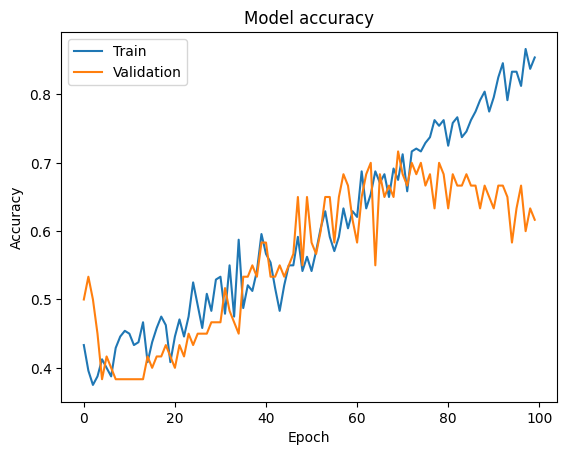

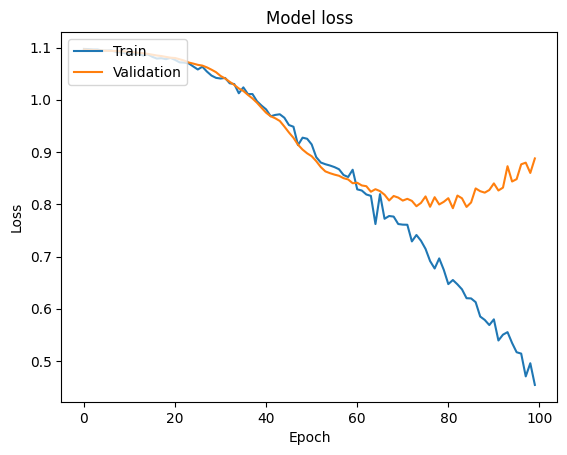

2/2 [==============================] - 1s 263ms/step
              precision    recall  f1-score   support

         HII       0.76      0.59      0.67        22
         PNE       0.36      0.50      0.42        16
          RG       0.76      0.73      0.74        22

    accuracy                           0.62        60
   macro avg       0.63      0.61      0.61        60
weighted avg       0.66      0.62      0.63        60

Confusion matrix, without normalization
[[13  8  1]
 [ 4  8  4]
 [ 0  6 16]]
Normalized confusion matrix
[[0.59 0.36 0.05]
 [0.25 0.5  0.25]
 [0.   0.27 0.73]]


<Figure size 640x480 with 0 Axes>

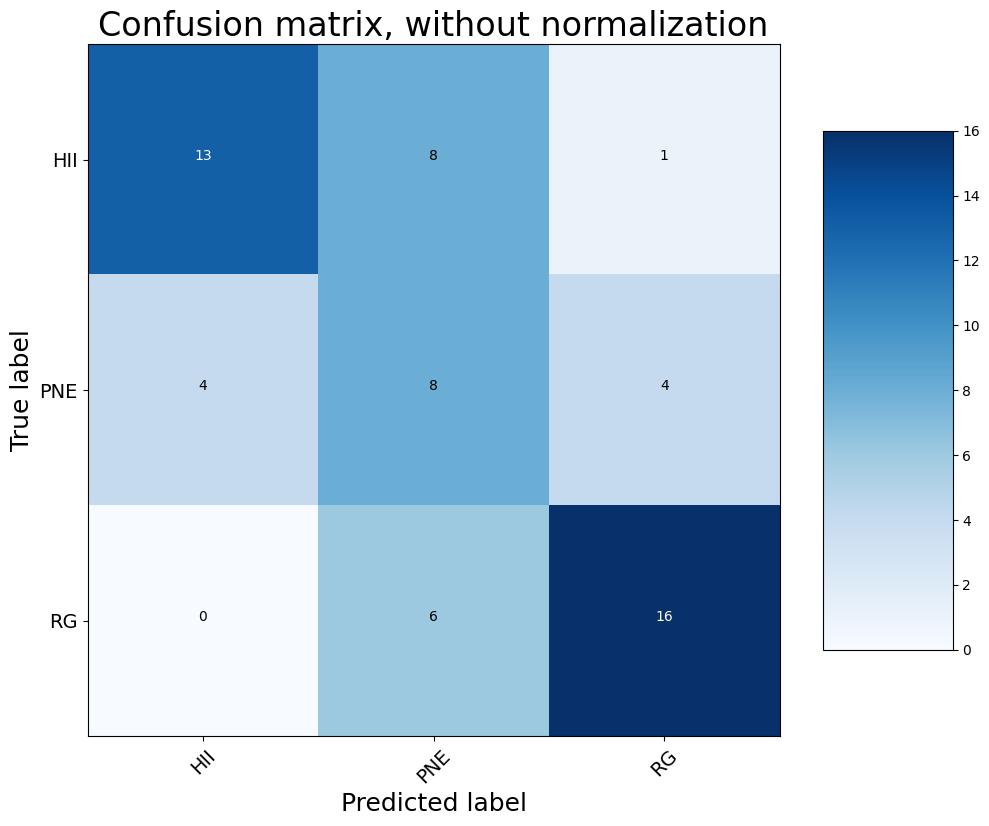

<Figure size 640x480 with 0 Axes>

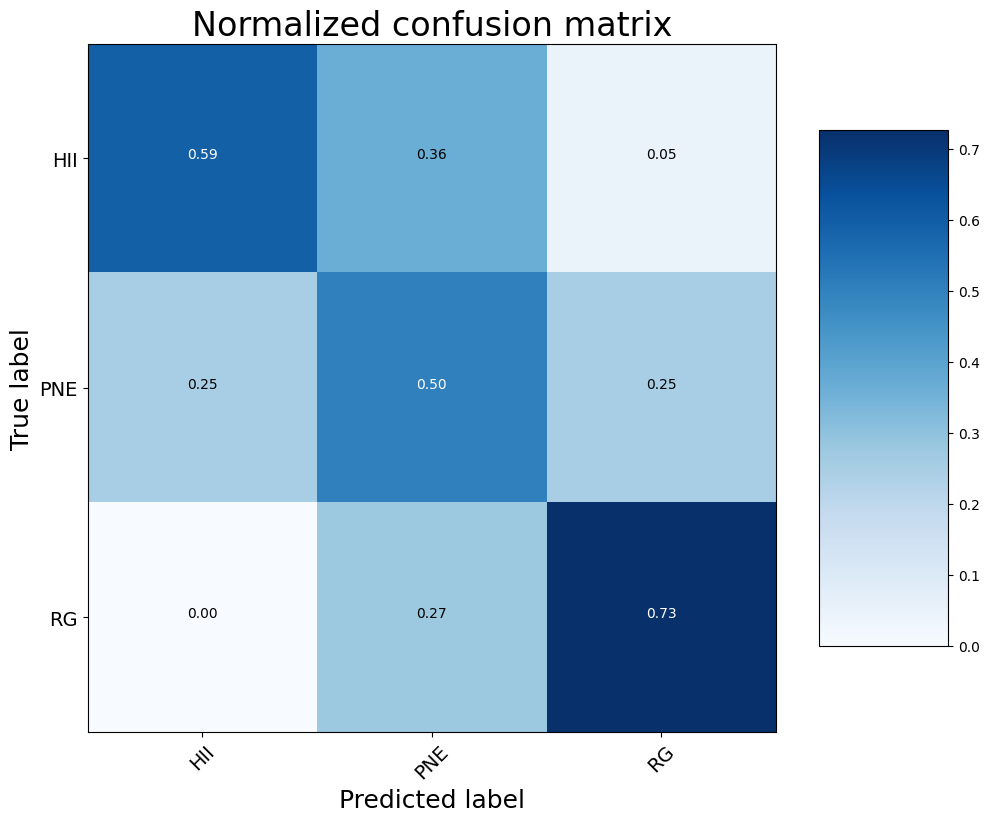

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(H2.history['accuracy'])
plt.plot(H2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate a classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)  # Generates predictions for the test data.
y_pred_classes = np.argmax(y_pred, axis=1)  # Converts the predicted probabilities to class labels by taking the index of the maximum value along the second axis.
y_true = np.argmax(y_test_cat, axis=1)  # Converts the one-hot encoded test labels to class labels.
print(classification_report(y_true, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Prints a classification report that includes precision, recall, F1-score, and support for each class.

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # Displays the confusion matrix as an image.
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))  # Generates an array of tick marks based on the number of classes.
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'  # Sets the format for the values in the confusion matrix to two decimal places if normalized, otherwise to integers.
    thresh = cm.max() / 2.  # Calculates the threshold for changing the text color.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
# Iterates over the confusion matrix and adds text annotations to each cell, changing the text color based on the threshold.
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_classes) # Computes the confusion matrix for the true and predicted labels.
np.set_printoptions(precision=2) # Sets the precision for printing numpy arrays to 2 decimal places.

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HII', 'PNE', 'RG'],
                      title='Confusion matrix, without normalization') # Plots the non-normalized confusion matrix.

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HII', 'PNE', 'RG'], normalize=True,
                      title='Normalized confusion matrix') # Plots the normalized confusion matrix.

plt.show()

## Tweak the CNN to improve performance

As before, try to improve your classifier by changing the following:

- The learning rate and number of epochs (smaller learning rate generally requires more training epochs and vice versa).
- The number of hidden layers (only try 1-2 extra).
- The number of neurons in the layers (again, only try 1-2 different values).
- You may also try changing the input resolution of the images.

<font color='blue'> **(2c)** For each tweak, explain and justify what was changed, run the classification reports, generate a confusion matrix, produce plots of the history of the Loss and Accuracy, and give a brief assessment of the performance. </font>

<font color='blue'> **(2d)** Finally, give a summary report for the best classifier achieved, and outline which of the changes was most effective. How did your best CNN classifier compare with your best ANN classifier?</font>

In [ ]:
# First, we tweak the learning rate and the number of epochs

Epoch 1/200
8/8 [==============================] - 11s 1s/step - loss: 1.0990 - accuracy: 0.3458 - val_loss: 1.0991 - val_accuracy: 0.4000
Epoch 2/200
8/8 [==============================] - 11s 1s/step - loss: 1.0981 - accuracy: 0.3375 - val_loss: 1.0989 - val_accuracy: 0.3667
Epoch 3/200
8/8 [==============================] - 12s 2s/step - loss: 1.0975 - accuracy: 0.3375 - val_loss: 1.0987 - val_accuracy: 0.3833
Epoch 4/200
8/8 [==============================] - 10s 1s/step - loss: 1.0975 - accuracy: 0.3667 - val_loss: 1.0986 - val_accuracy: 0.3833
Epoch 5/200
8/8 [==============================] - 11s 1s/step - loss: 1.0969 - accuracy: 0.4167 - val_loss: 1.0985 - val_accuracy: 0.3500
Epoch 6/200
8/8 [==============================] - 11s 1s/step - loss: 1.0973 - accuracy: 0.3583 - val_loss: 1.0983 - val_accuracy: 0.3667
Epoch 7/200
8/8 [==============================] - 10s 1s/step - loss: 1.0966 - accuracy: 0.3333 - val_loss: 1.0981 - val_accuracy: 0.3667
Epoch 8/200
8/8 [==========

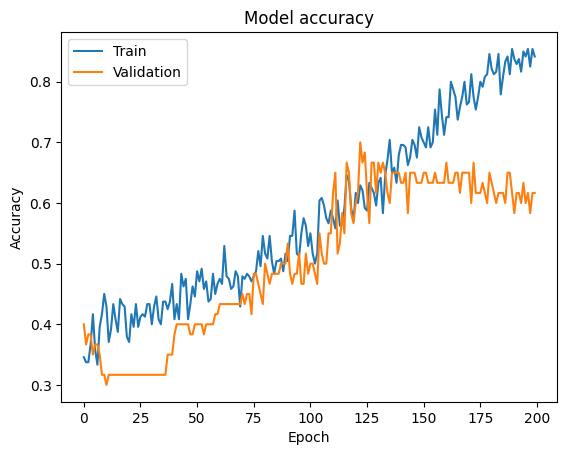

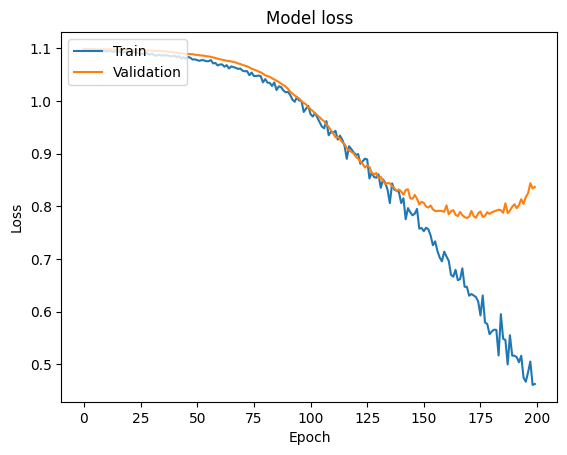

2/2 [==============================] - 1s 271ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       0.75      0.55      0.63        22
         PNE       0.39      0.44      0.41        16
          RG       0.69      0.82      0.75        22

    accuracy                           0.62        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.63      0.62      0.62        60

Normalized confusion matrix
[[0.55 0.32 0.14]
 [0.25 0.44 0.31]
 [0.   0.18 0.82]]


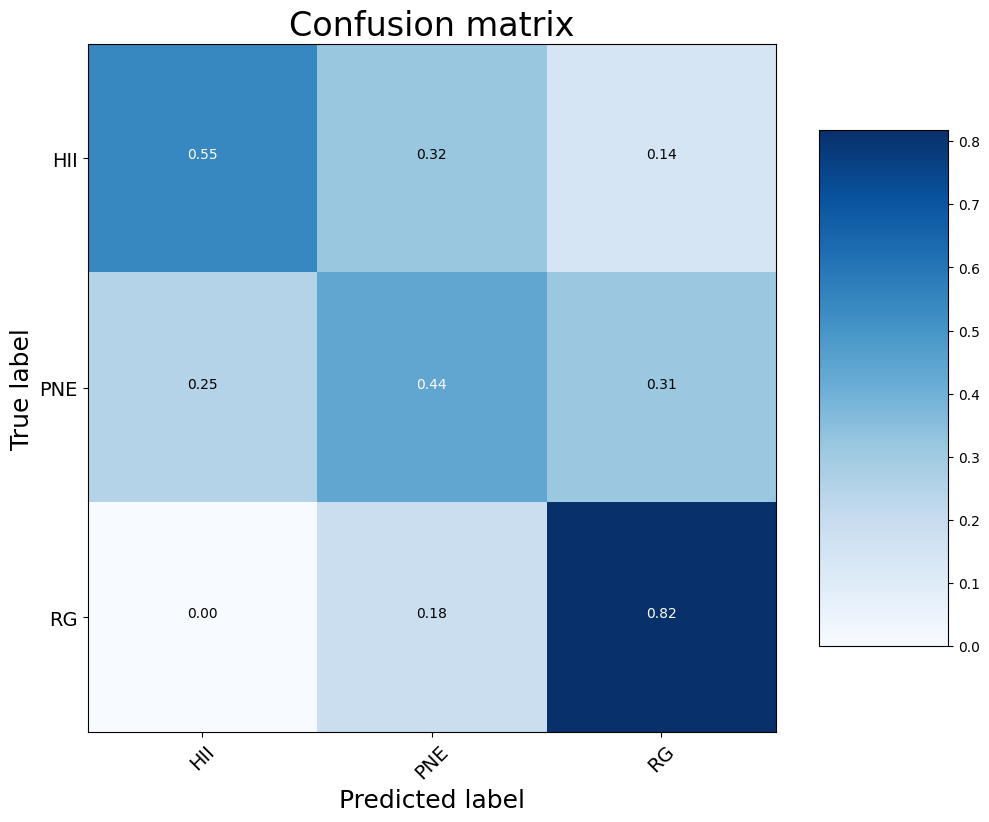

In [ ]:
# Define the CNN architecture
input_shape = X_train.shape[1:]  # Shape of a single image

model = Sequential() # Initializes a Sequential model.

# First CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the first convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Second CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the second convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Third CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the third convolutional layer with 64 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# FC => RELU => DROP
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Flattens the 3D output to 1D, adds a dense layer with 64 units, ReLU activation, and dropout with a rate of 0.5.

# Softmax classifier
nClasses = 3
model.add(Dense(nClasses))
model.add(Activation('softmax'))

# Adds the output layer with 3 units (one for each class) and softmax activation.

# Compile the model
opt = SGD(learning_rate=0.0005, momentum=0.9) # Initializes the optimizer with a learning rate of 0.0005 and momentum of 0.9.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # Compiles the model with categorical cross-entropy loss and accuracy metric.

# Train the model
batchSize = 32
nEpochs = 200

# Sets the batch size and number of epochs.

H2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batchSize, epochs=nEpochs, verbose=1) # Trains the model and stores the training history.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test) # Evaluates the model on the test data.
print('Test accuracy:', test_acc) # Prints the test accuracy.

# Plot training & validation accuracy values
plt.plot(H2.history['accuracy'])
plt.plot(H2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict the labels for the test data
y_pred = model.predict(X_test)  # Generates predictions for the test data.
y_pred_classes = np.argmax(y_pred, axis=1)  # Converts the predicted probabilities to class labels by taking the index of the maximum value along the second axis.
y_true = np.argmax(y_test_cat, axis=1)  # Converts the one-hot encoded test labels to class labels.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['HII', 'PNE', 'RG'], normalize=True)
plt.show()

In [ ]:
# Here, we add an additional hidden layer.

Epoch 1/100
8/8 [==============================] - 12s 1s/step - loss: 1.0998 - accuracy: 0.2708 - val_loss: 1.0998 - val_accuracy: 0.2833
Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 1.0982 - accuracy: 0.3167 - val_loss: 1.0994 - val_accuracy: 0.3167
Epoch 3/100
8/8 [==============================] - 11s 1s/step - loss: 1.0983 - accuracy: 0.2958 - val_loss: 1.0994 - val_accuracy: 0.2833
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0994 - val_accuracy: 0.2667
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 1.0971 - accuracy: 0.3583 - val_loss: 1.0999 - val_accuracy: 0.2667
Epoch 6/100
8/8 [==============================] - 11s 1s/step - loss: 1.0974 - accuracy: 0.3458 - val_loss: 1.0998 - val_accuracy: 0.2667
Epoch 7/100
8/8 [==============================] - 12s 2s/step - loss: 1.0977 - accuracy: 0.3458 - val_loss: 1.0996 - val_accuracy: 0.2667
Epoch 8/100
8/8 [==========

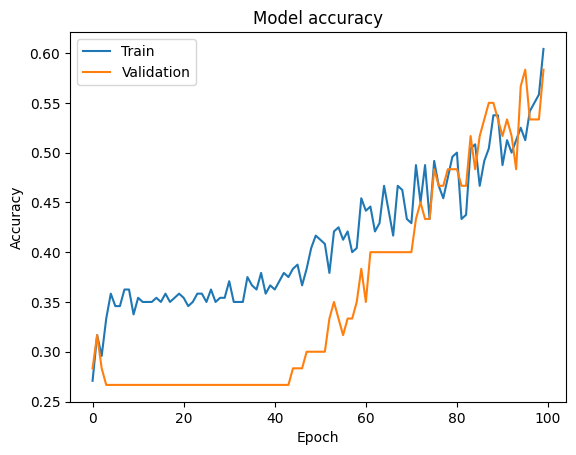

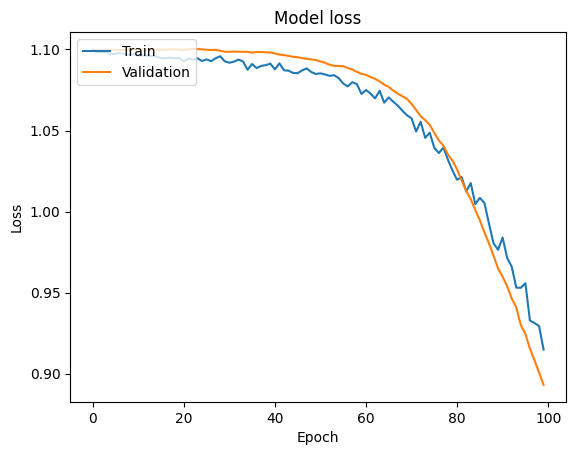

2/2 [==============================] - 1s 483ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       0.82      0.64      0.72        22
         PNE       0.37      0.62      0.47        16
          RG       0.69      0.50      0.58        22

    accuracy                           0.58        60
   macro avg       0.63      0.59      0.59        60
weighted avg       0.65      0.58      0.60        60

Normalized confusion matrix
[[0.64 0.27 0.09]
 [0.19 0.62 0.19]
 [0.   0.5  0.5 ]]


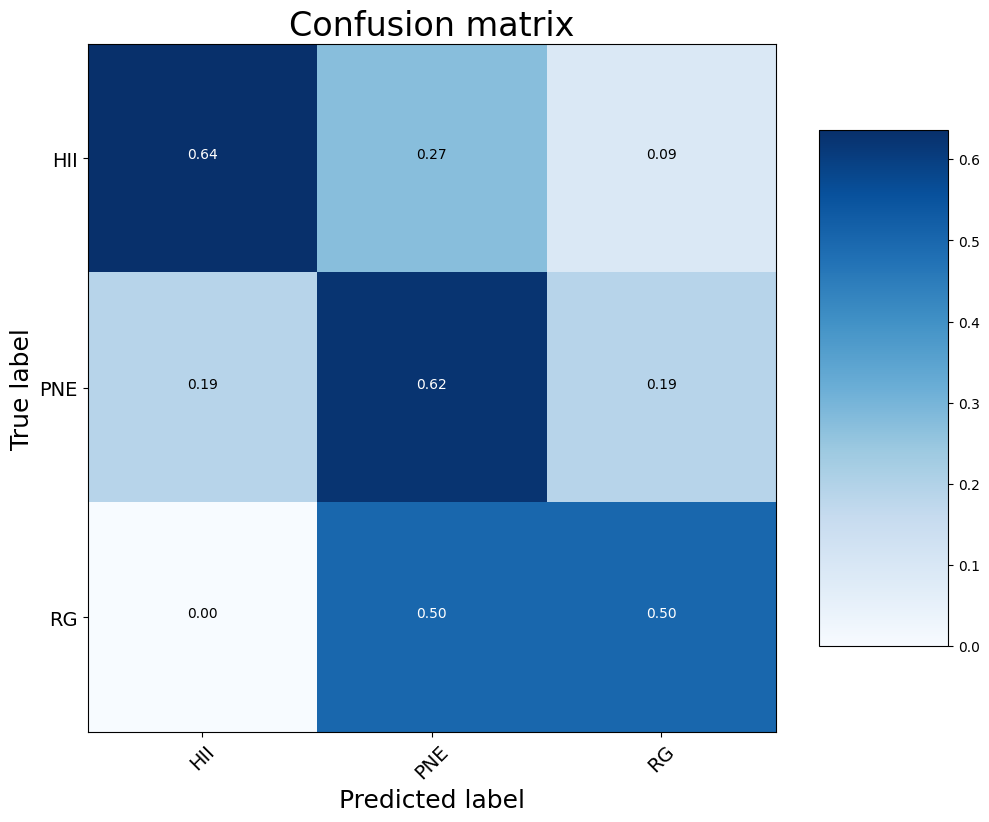

In [ ]:
 # Define the CNN architecture
input_shape = X_train.shape[1:]  # Shape of a single image

model = Sequential() # Initializes a Sequential model.

# First CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the first convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Second CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the second convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Third CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the Third convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Fourth CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the Fourth convolutional layer with 64 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# FC => RELU => DROP
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Flattens the 3D output to 1D, adds a dense layer with 64 units, ReLU activation, and dropout with a rate of 0.5.

# Softmax classifier
nClasses = 3
model.add(Dense(nClasses))
model.add(Activation('softmax'))

# Adds the output layer with 3 units (one for each class) and softmax activation.

# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9) # Initializes the optimizer with a learning rate of 0.001 and momentum of 0.9.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # Compiles the model with categorical cross-entropy loss and accuracy metric.

# Train the model
batchSize = 32
nEpochs = 100

# Sets the batch size and number of epochs.

H2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batchSize, epochs=nEpochs, verbose=1) # Trains the model and stores the training history.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test) # Evaluates the model on the test data.
print('Test accuracy:', test_acc) # Prints the test accuracy.

# Plot training & validation accuracy values
plt.plot(H2.history['accuracy'])
plt.plot(H2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict the labels for the test data
y_pred = model.predict(X_test)  # Generates predictions for the test data.
y_pred_classes = np.argmax(y_pred, axis=1)  # Converts the predicted probabilities to class labels by taking the index of the maximum value along the second axis.
y_true = np.argmax(y_test_cat, axis=1)  # Converts the one-hot encoded test labels to class labels.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['HII', 'PNE', 'RG'], normalize=True)
plt.show()

In [ ]:
# Finally, we increase the number of neurons.

Epoch 1/100
8/8 [==============================] - 12s 1s/step - loss: 1.0975 - accuracy: 0.3917 - val_loss: 1.0961 - val_accuracy: 0.5833
Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 1.0976 - accuracy: 0.3750 - val_loss: 1.0957 - val_accuracy: 0.5333
Epoch 3/100
8/8 [==============================] - 12s 2s/step - loss: 1.0952 - accuracy: 0.4000 - val_loss: 1.0951 - val_accuracy: 0.4333
Epoch 4/100
8/8 [==============================] - 12s 2s/step - loss: 1.0939 - accuracy: 0.4417 - val_loss: 1.0941 - val_accuracy: 0.4500
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 1.0936 - accuracy: 0.4500 - val_loss: 1.0936 - val_accuracy: 0.4500
Epoch 6/100
8/8 [==============================] - 11s 1s/step - loss: 1.0936 - accuracy: 0.4208 - val_loss: 1.0934 - val_accuracy: 0.4333
Epoch 7/100
8/8 [==============================] - 11s 1s/step - loss: 1.0910 - accuracy: 0.4167 - val_loss: 1.0923 - val_accuracy: 0.4667
Epoch 8/100
8/8 [===========

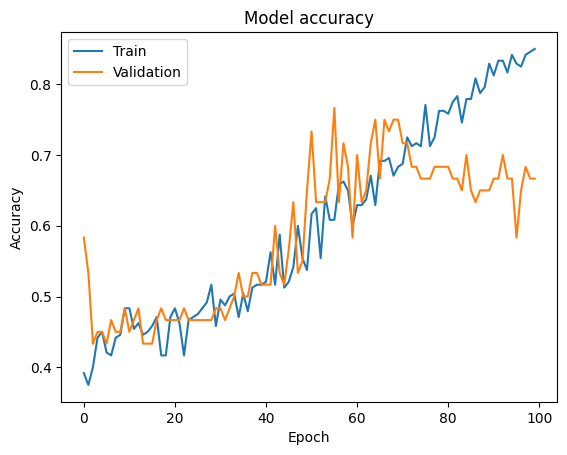

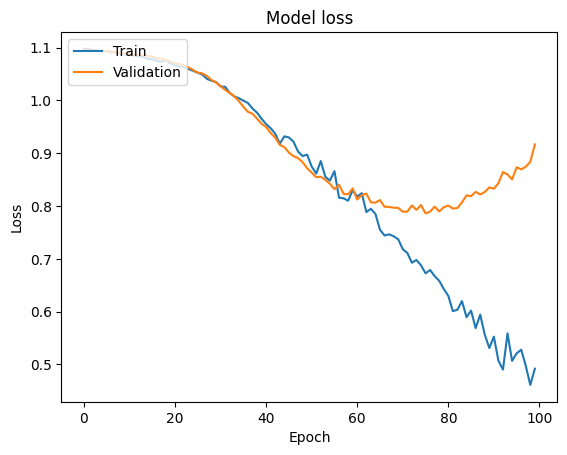

2/2 [==============================] - 1s 281ms/step
Classification Report:
              precision    recall  f1-score   support

         HII       0.78      0.64      0.70        22
         PNE       0.46      0.38      0.41        16
          RG       0.69      0.91      0.78        22

    accuracy                           0.67        60
   macro avg       0.64      0.64      0.63        60
weighted avg       0.66      0.67      0.65        60

Normalized confusion matrix
[[0.64 0.23 0.14]
 [0.25 0.38 0.38]
 [0.   0.09 0.91]]


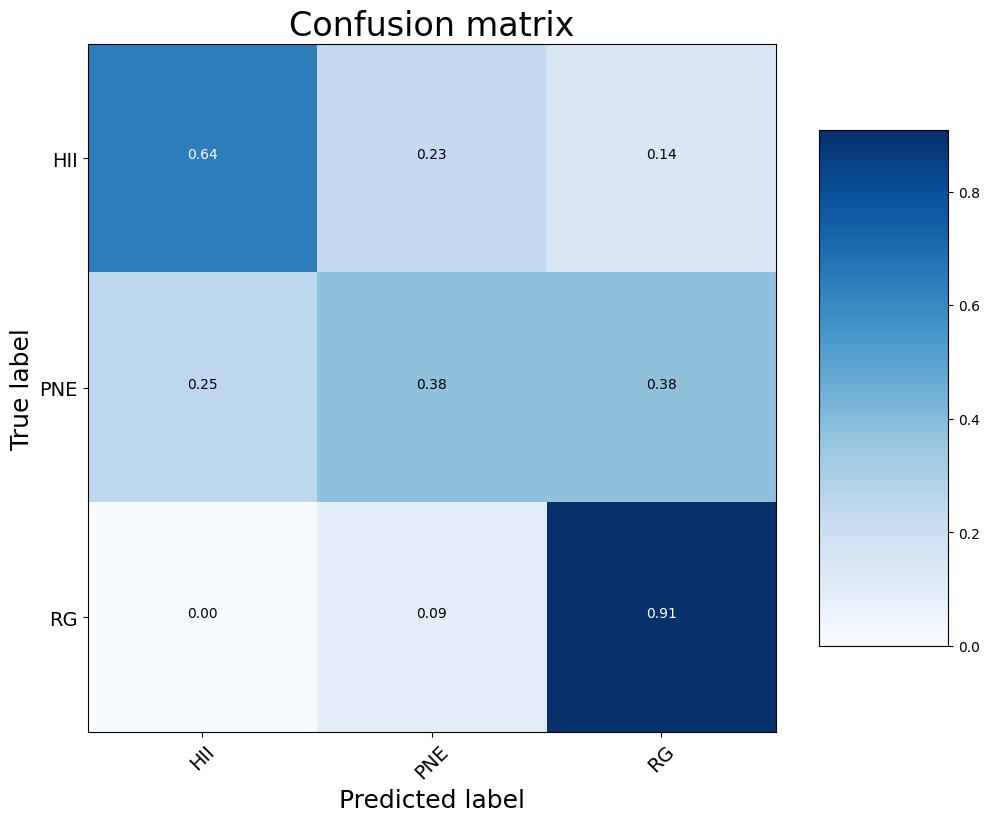

In [ ]:
# Define the CNN architecture
input_shape = X_train.shape[1:]  # Shape of a single image

model = Sequential() # Initializes a Sequential model.

# First CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the first convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Second CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the second convolutional layer with 32 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# Third CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adds the third convolutional layer with 64 filters of size 3x3, ReLU activation, and max pooling with a pool size of 2x2.

# FC => RELU => DROP
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Flattens the 3D output to 1D, adds a dense layer with 128 units, ReLU activation, and dropout with a rate of 0.5.

# Softmax classifier
nClasses = 3
model.add(Dense(nClasses))
model.add(Activation('softmax'))

# Adds the output layer with 3 units (one for each class) and softmax activation.

# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9) # Initializes the optimizer with a learning rate of 0.001 and momentum of 0.9.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # Compiles the model with categorical cross-entropy loss and accuracy metric.

# Train the model
batchSize = 32
nEpochs = 100

# Sets the batch size and number of epochs.

H2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batchSize, epochs=nEpochs, verbose=1) # Trains the model and stores the training history.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test) # Evaluates the model on the test data.
print('Test accuracy:', test_acc) # Prints the test accuracy.

# Plot training & validation accuracy values
plt.plot(H2.history['accuracy'])
plt.plot(H2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict the labels for the test data
y_pred = model.predict(X_test)  # Generates predictions for the test data.
y_pred_classes = np.argmax(y_pred, axis=1)  # Converts the predicted probabilities to class labels by taking the index of the maximum value along the second axis.
y_true = np.argmax(y_test_cat, axis=1)  # Converts the one-hot encoded test labels to class labels.

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['HII', 'PNE', 'RG']))

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['HII', 'PNE', 'RG'], normalize=True)
plt.show()

## Stretch Goal: Data Augmentation

It is possible to increase the size of our training set by manipulating the current data. For example, we can increase the size of our training set by rotating each image by 90, 180, and 270 degrees. Because our images of HII regions, PNE and RGs can have very similar shapes, but many different orientations on the sky, adding rotated images can help the CNN better learn our data. Aside from rotation, there are many other ways to augment the data, e.g., mirror-imaging, scaling the size, changing the perspective, and more.

Here, you can modify your training dataset using the ndimage.rotate function. In principle, you can add as many random orientations as you like, but I suggest that you start by rotating the three images for each source by 90, 180, and 270 degrees. You will need to also produce a new set of labels for your expanded dataset.

<font color='blue'> **(2e)** Rerun your best CNN classifier on this new training set. Can you see an improvement in performance? (only required for PHYS7912 students)</font>
